In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, impute, inspection, model_selection, pipeline, cluster, metrics, decomposition, feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Credit: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 25
MEDIUM_SIZE = 40
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text siz
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titl

## Import Data

### Large Dataset

In [3]:
# Import dataset
ldf = pd.read_csv("../data/dota2_matches_large_encoded.csv")
ldf.drop(columns='lobby_type', inplace=True)
print(ldf.shape)
ldf.head()

(209890, 325)


radiant_win  dire_rating  dire_wins  dire_losses  radiant_rating  \
0         True      917.940          9           19        1132.550   
1         True      871.514         14           30         972.515   
2        False     1132.550        104          128         917.940   
3         True      972.515          2            3         871.514   
4         True     1092.110         15            8        1093.280   

   radiant_wins  radiant_losses  cluster_0  cluster_1  cluster_2  ...  \
0           104             128        0.0        0.0        0.0  ...   
1             2               3        0.0        0.0        0.0  ...   
2             9              19        0.0        0.0        0.0  ...   
3            14              30        0.0        0.0        0.0  ...   
4           142             121        0.0        0.0        0.0  ...   

   radiant_Monkey King  radiant_Dark Willow  radiant_Pangolier  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   radiant_Grimstroke  radiant_Hoodwink  radiant_Void Spirit  \
0                   0                 0                    1   
1                   0                 0                    0   
2                   0                 0                    1   
3                   0                 0                    0   
4                   1                 0                    0   

   radiant_Snapfire  radiant_Mars  radiant_Dawnbreaker  radiant_Marci  
0                 0             0                    0              0  
1                 1             0                    0              0  
2                 1             0                    0              0  
3                 0             0                    0              0  
4                 0             0                    0              0  

[5 rows x 325 columns]

In [4]:
# Create train and test sets
Xl = ldf.drop("radiant_win", axis=1)
yl = ldf["radiant_win"]

#### Explore the data

In [8]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209890 entries, 0 to 209889
Columns: 325 entries, radiant_win to radiant_Marci
dtypes: bool(1), float64(76), int64(248)
memory usage: 519.0 MB


In [10]:
yl.value_counts(normalize=1)

True     0.5
False    0.5
Name: radiant_win, dtype: float64

### Small Dataset

In [5]:
# Import dataset
sdf = pd.read_csv("../data/dota2_matches_small.csv")
print(sdf.shape)
sdf.head()

(844, 214)


Anti-Mage  Axe  Bane  Bloodseeker  Crystal Maiden  Drow Ranger  \
0        0.0  0.0   2.0          0.0             0.0          0.0   
1        0.0  0.0   0.0          0.0             0.0          0.0   
2        0.0  0.0   0.0          0.0             0.0          0.0   
3        0.0  0.0   0.0          0.0             0.0          0.0   
4        0.0  0.0   1.0          0.0             0.0          0.0   

   Earthshaker  Juggernaut  Mirana  Morphling  ...  cluster_mode_league19  \
0          1.0         0.0     0.0        2.0  ...                    0.0   
1          0.0         0.0     0.0        0.0  ...                    0.0   
2          0.0         0.0     0.0        0.0  ...                    0.0   
3          0.0         0.0     0.0        0.0  ...                    0.0   
4          0.0         0.0     0.0        0.0  ...                    0.0   

   cluster_mode_league20  cluster_mode_league21  cluster_mode_league22  \
0                    0.0                    0.0                    1.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cluster_mode_league23  cluster_mode_league24  cluster_mode_league25  \
0                    0.0                    0.0                    1.0   
1                    1.0                    0.0                    1.0   
2                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    1.0   
4                    0.0                    1.0                    1.0   

   cluster_mode_league26  cluster_mode_league27  radiant_win  
0                    0.0                    1.0        False  
1                    0.0                    1.0        False  
2                    0.0                    1.0        False  
3                    0.0                    1.0        False  
4                    0.0                    1.0        False  

[5 rows x 214 columns]

In [6]:
# Create train and test sets
Xs = sdf.drop("radiant_win", axis=1)
ys = sdf["radiant_win"]

#### Explore the data

In [11]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Columns: 214 entries, Anti-Mage to radiant_win
dtypes: bool(1), float64(213)
memory usage: 1.4 MB


In [12]:
ys.value_counts(normalize=1)

False    0.5
True     0.5
Name: radiant_win, dtype: float64

In [111]:
#Store the importances of features
imp_small = pd.DataFrame()  
imp_large = pd.DataFrame()

In [112]:
# For feature selection classifiers later on
og_small_score = dict()
og_large_score = dict()

## Classification Models

### K-fold coss-validation

In [113]:
def k_fold_validate(folds, model, features, target, model_type, output=True):
    kf = model_selection.KFold(n_splits=folds, shuffle=True, random_state=3)
    
    rec, prec, f1 = [], [], []
    imp_df = pd.DataFrame()
    for train_index, test_index in kf.split(features):
        # Retrieve the train and test sets
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Standardize the data to optimize performance
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Fit the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate the model
        rec += [metrics.recall_score(y_pred, y_test)]
        prec += [metrics.precision_score(y_pred, y_test)]
        f1 += [metrics.f1_score(y_pred, y_test)]
        
        # Store the feature importances for the fold
        if model_type == 'lrm':
            imps = abs(model.coef_[0])
        elif model_type == 'dtm' or model_type == 'rfm':
            imps = model.feature_importances_
        elif model_type == 'nbm':
            imps = inspection.permutation_importance(model, X_test, y_test).importances_mean
          
        imps = {k:v for k,v in enumerate(imps)}
        imp_df = imp_df.append(imps, ignore_index=True)
        
    if output:
        print("recall    = {:.4f} ±{:.4f} {}".format(np.mean(rec), np.std(rec), rec))
        print("precision = {:.4f} ±{:.4f} {}".format(np.mean(prec), np.std(prec), prec))
        print("f1        = {:.4f} ±{:.4f} {}".format(np.mean(f1), np.std(f1), f1))
    
    scores = {'recall': [np.mean(rec), np.std(rec)],
              'precision': [np.mean(prec), np.std(prec)],
              'f1': [np.mean(f1), np.std(f1)],
              'feature_ranks': {k:v for k, v in enumerate(imp_df.mean(axis=0))}            
             }        
        
    return scores

### Logistic Regression

In [114]:
# Small Dataset
lrm = LogisticRegression(max_iter=1000)
scores = k_fold_validate(5, lrm, Xs, ys, 'lrm')
og_small_score['lrm'] = scores['f1'][0]
imp_small = imp_small.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.2622 ±0.0442 [0.32558139534883723, 0.19767441860465115, 0.2638888888888889, 0.23376623376623376, 0.29]
precision = 0.2662 ±0.0727 [0.32941176470588235, 0.21794871794871795, 0.19791666666666666, 0.20930232558139536, 0.37662337662337664]
f1        = 0.2619 ±0.0540 [0.32748538011695905, 0.20731707317073167, 0.22619047619047616, 0.22085889570552147, 0.327683615819209]


In [115]:
# Large Dataset
lrm = LogisticRegression(max_iter=1000)
scores = k_fold_validate(5, lrm, Xl, yl, 'lrm')
og_large_score['lrm'] = scores['f1'][0]
imp_large = imp_large.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.6362 ±0.0035 [0.6299548901046166, 0.6375746001432323, 0.6367704465390841, 0.6406965648854962, 0.6362080441190453]
precision = 0.6353 ±0.0051 [0.6254228405355186, 0.637270341207349, 0.6394187102633969, 0.6355418835778514, 0.6386979763268423]
f1        = 0.6358 ±0.0040 [0.6276806847251775, 0.6374224343675418, 0.6380918306499702, 0.6381088144452364, 0.63745057876435]


### Decision Tree

In [116]:
# Small Dataset
dtm = DecisionTreeClassifier()
scores = k_fold_validate(5, dtm, Xs, ys, 'dtm')
og_small_score['dtm'] = scores['f1'][0]
imp_small = imp_small.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.4856 ±0.0739 [0.4943820224719101, 0.44554455445544555, 0.6, 0.5113636363636364, 0.3764705882352941]
precision = 0.5192 ±0.0565 [0.5176470588235295, 0.5769230769230769, 0.5625, 0.5232558139534884, 0.4155844155844156]
f1        = 0.5003 ±0.0598 [0.5057471264367817, 0.5027932960893855, 0.5806451612903225, 0.5172413793103449, 0.39506172839506176]


In [117]:
# Large Dataset
dtm = DecisionTreeClassifier()
scores = k_fold_validate(5, dtm, Xl, yl, 'dtm')
og_large_score['dtm'] = scores['f1'][0]
imp_large = imp_large.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.6044 ±0.0033 [0.6007559085255, 0.608159165909417, 0.6006924682223487, 0.6078171579993376, 0.6046699638577135]
precision = 0.6051 ±0.0035 [0.5982657582543237, 0.6068241469816273, 0.6054304699077394, 0.6079034548035968, 0.6068633066055746]
f1        = 0.6047 ±0.0031 [0.5995082475949488, 0.6074909229887254, 0.6030521629407424, 0.6078603033386176, 0.605764649833254]


### Random Forest

In [118]:
# Small Dataset
rfm = RandomForestClassifier()
scores = k_fold_validate(5, rfm, Xs, ys, 'rfm')
og_small_score['rfm'] = scores['f1'][0]
imp_small = imp_small.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.1099 ±0.0321 [0.08536585365853659, 0.07608695652173914, 0.16666666666666666, 0.12048192771084337, 0.10112359550561797]
precision = 0.1040 ±0.0148 [0.08235294117647059, 0.08974358974358974, 0.11458333333333333, 0.11627906976744186, 0.11688311688311688]
f1        = 0.1058 ±0.0205 [0.08383233532934131, 0.08235294117647059, 0.13580246913580246, 0.1183431952662722, 0.10843373493975904]


In [119]:
# Large Dataset
rfm = RandomForestClassifier()
scores = k_fold_validate(5, rfm, Xl, yl, 'rfm')
og_large_score['rfm'] = scores['f1'][0]
imp_large = imp_large.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.6729 ±0.0018 [0.6703740157480315, 0.6715444798609099, 0.6755038153003327, 0.672921337362316, 0.6740653633201039]
precision = 0.6566 ±0.0051 [0.6490066225165563, 0.6635647816750179, 0.6601653998757111, 0.6534311405584478, 0.6565960290187094]
f1        = 0.6646 ±0.0031 [0.6595172964729236, 0.6675307841866495, 0.6677465367599061, 0.663033038801383, 0.665216024757622]


### Naive Bayes

In [120]:
# Small Dataset
nbm = GaussianNB()
scores = k_fold_validate(5, nbm, Xs, ys, 'nbm')
og_small_score['nbm'] = scores['f1'][0]
imp_small = imp_small.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.3375 ±0.1281 [0.45454545454545453, 0.14285714285714285, 0.49206349206349204, 0.34146341463414637, 0.2564102564102564]
precision = 0.3783 ±0.2863 [0.7647058823529411, 0.02564102564102564, 0.6458333333333334, 0.32558139534883723, 0.12987012987012986]
f1        = 0.3356 ±0.2082 [0.5701754385964911, 0.043478260869565216, 0.5585585585585586, 0.33333333333333337, 0.17241379310344826]


 WARNING: Takes a 15-20 min to run

In [121]:
# Large Dataset
nbm = GaussianNB()
scores = k_fold_validate(5, nbm, Xl, yl, 'nbm')
og_large_score['nbm'] = scores['f1'][0]
imp_large = imp_large.append(scores['feature_ranks'], ignore_index=True)

recall    = 0.5473 ±0.0267 [0.5558936062324252, 0.5467196819085487, 0.49826001391988867, 0.5562627869970448, 0.5791245791245792]
precision = 0.4394 ±0.3705 [0.5745390442612797, 0.026246719160104987, 0.9924470576987428, 0.5790345480359678, 0.024627720504009163]
f1        = 0.3787 ±0.2718 [0.5650625556440653, 0.050088793770775464, 0.6634391077876841, 0.5674202898550725, 0.047246257382227715]


### Clean Up

In [122]:
#add column and row labels
imp_small['model'] = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
imp_small.set_index('model', inplace=True)
imp_small.columns = Xs.columns
imp_small.shape

(4, 213)

In [123]:
#add column and row labels
imp_large['model'] = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
imp_large.set_index('model', inplace=True)
imp_large.columns = Xl.columns
imp_large.shape

(4, 324)

## Feature Analysis

Brownlee, Jason. “How to Choose a Feature Selection Method for Machine Learning.” How to Choose a Feature Selection Method For Machine Learning, Machine Learning Mastery, 20 Aug. 2020, https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/. 

In [125]:
#Create pipeline for grid search
pipe = pipeline.Pipeline([
                     ('scaler',preprocessing.StandardScaler()),
                     ('model',Ridge())
])

#Grid search for model with the most optimum hyperparameter
search = model_selection.GridSearchCV(pipe, {'model__alpha':np.arange(0.1,10,0.1)}, cv = 5, scoring="neg_mean_squared_error")
search.fit(Xs, ys)

# Retrieve feature importances from the optimized model
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
imp_small.loc['Ridge Regression', :] = importance

### Small Dataset

#### Plot Top Features

In [189]:
#Scall all importances between 0 and 1
imp_small_inv = imp_small.transpose()
mm_scaler = preprocessing.MinMaxScaler()
imp_small_inv = pd.DataFrame(mm_scaler.fit_transform(imp_small_inv), columns=imp_small_inv.columns, index=imp_small_inv.index)
small_imp = imp_small_inv.transpose()
small_imp.shape

(5, 213)

In [190]:
# Find the top # important features for each model
models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
top = list()
for model in models:
    ranks = small_imp.loc[model,:]
    sorted_ranks = {imp_small.columns[k]:v for k,v in sorted(enumerate(ranks), key=lambda item: item[1], reverse=True)}
    top.extend([list(sorted_ranks.keys())[i] for i in range(5)])
    
#New df of only the top columns
top_df = small_imp.copy()
cols = [i for i in imp_small.columns if i not in set(top)]
top_df.drop(columns=cols, inplace=True)

top_df.sort_values(['Decision Trees', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],axis=1, inplace=True)

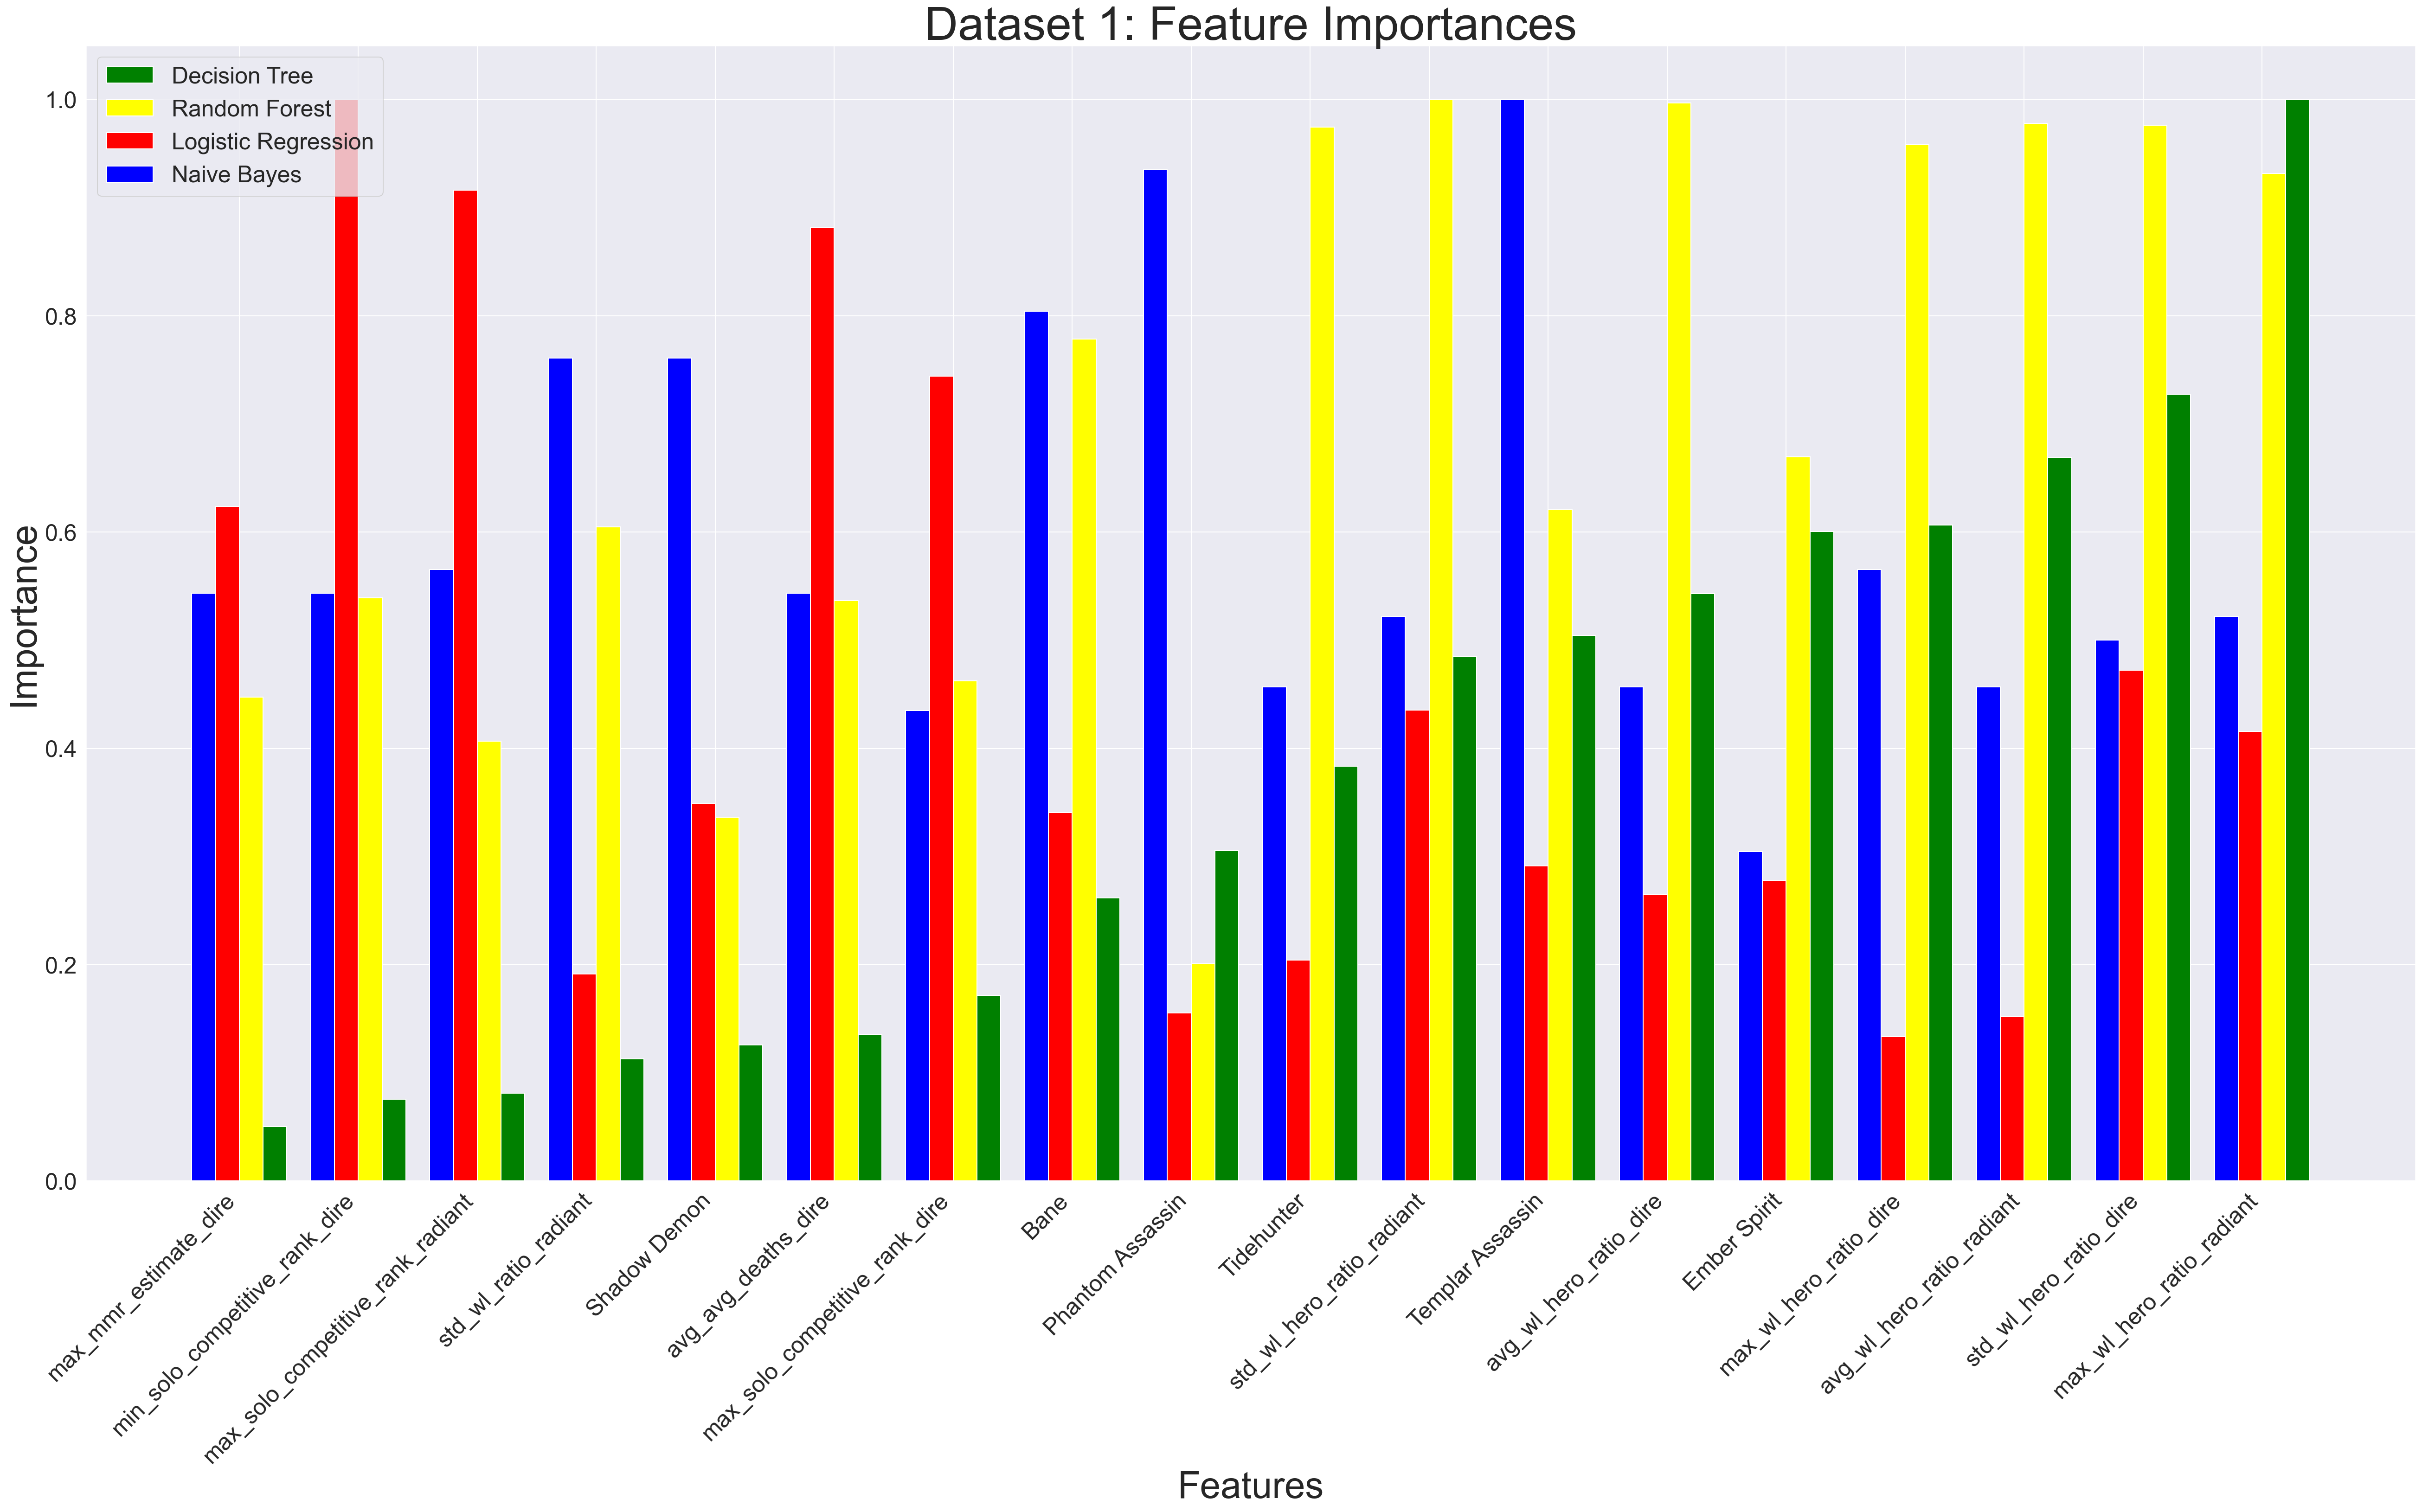

In [191]:
# Create figure and subplots
index = np.arange(top_df.shape[1]*2, step=2)
fig, ax = plt.subplots(figsize=(45,25))

# Plot bars
ax.bar(index + 1.2, top_df.iloc[1, :], .4, color='green', label='Decision Tree')
ax.bar(index + .8, top_df.iloc[2, :], .4, color='yellow',  label='Random Forest')
ax.bar(index + .4, top_df.iloc[0, :], .4, color='red', label='Logistic Regression')
ax.bar(index, top_df.iloc[3, :], .4, color='blue', label='Naive Bayes')

# Annotate graph
ax.set(xticks=index+.6, xticklabels=top_df.columns)
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.title('Dataset 1: Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig('feature_importance_small.png')
plt.show()

#### Pearson correlation for the some the top important features 

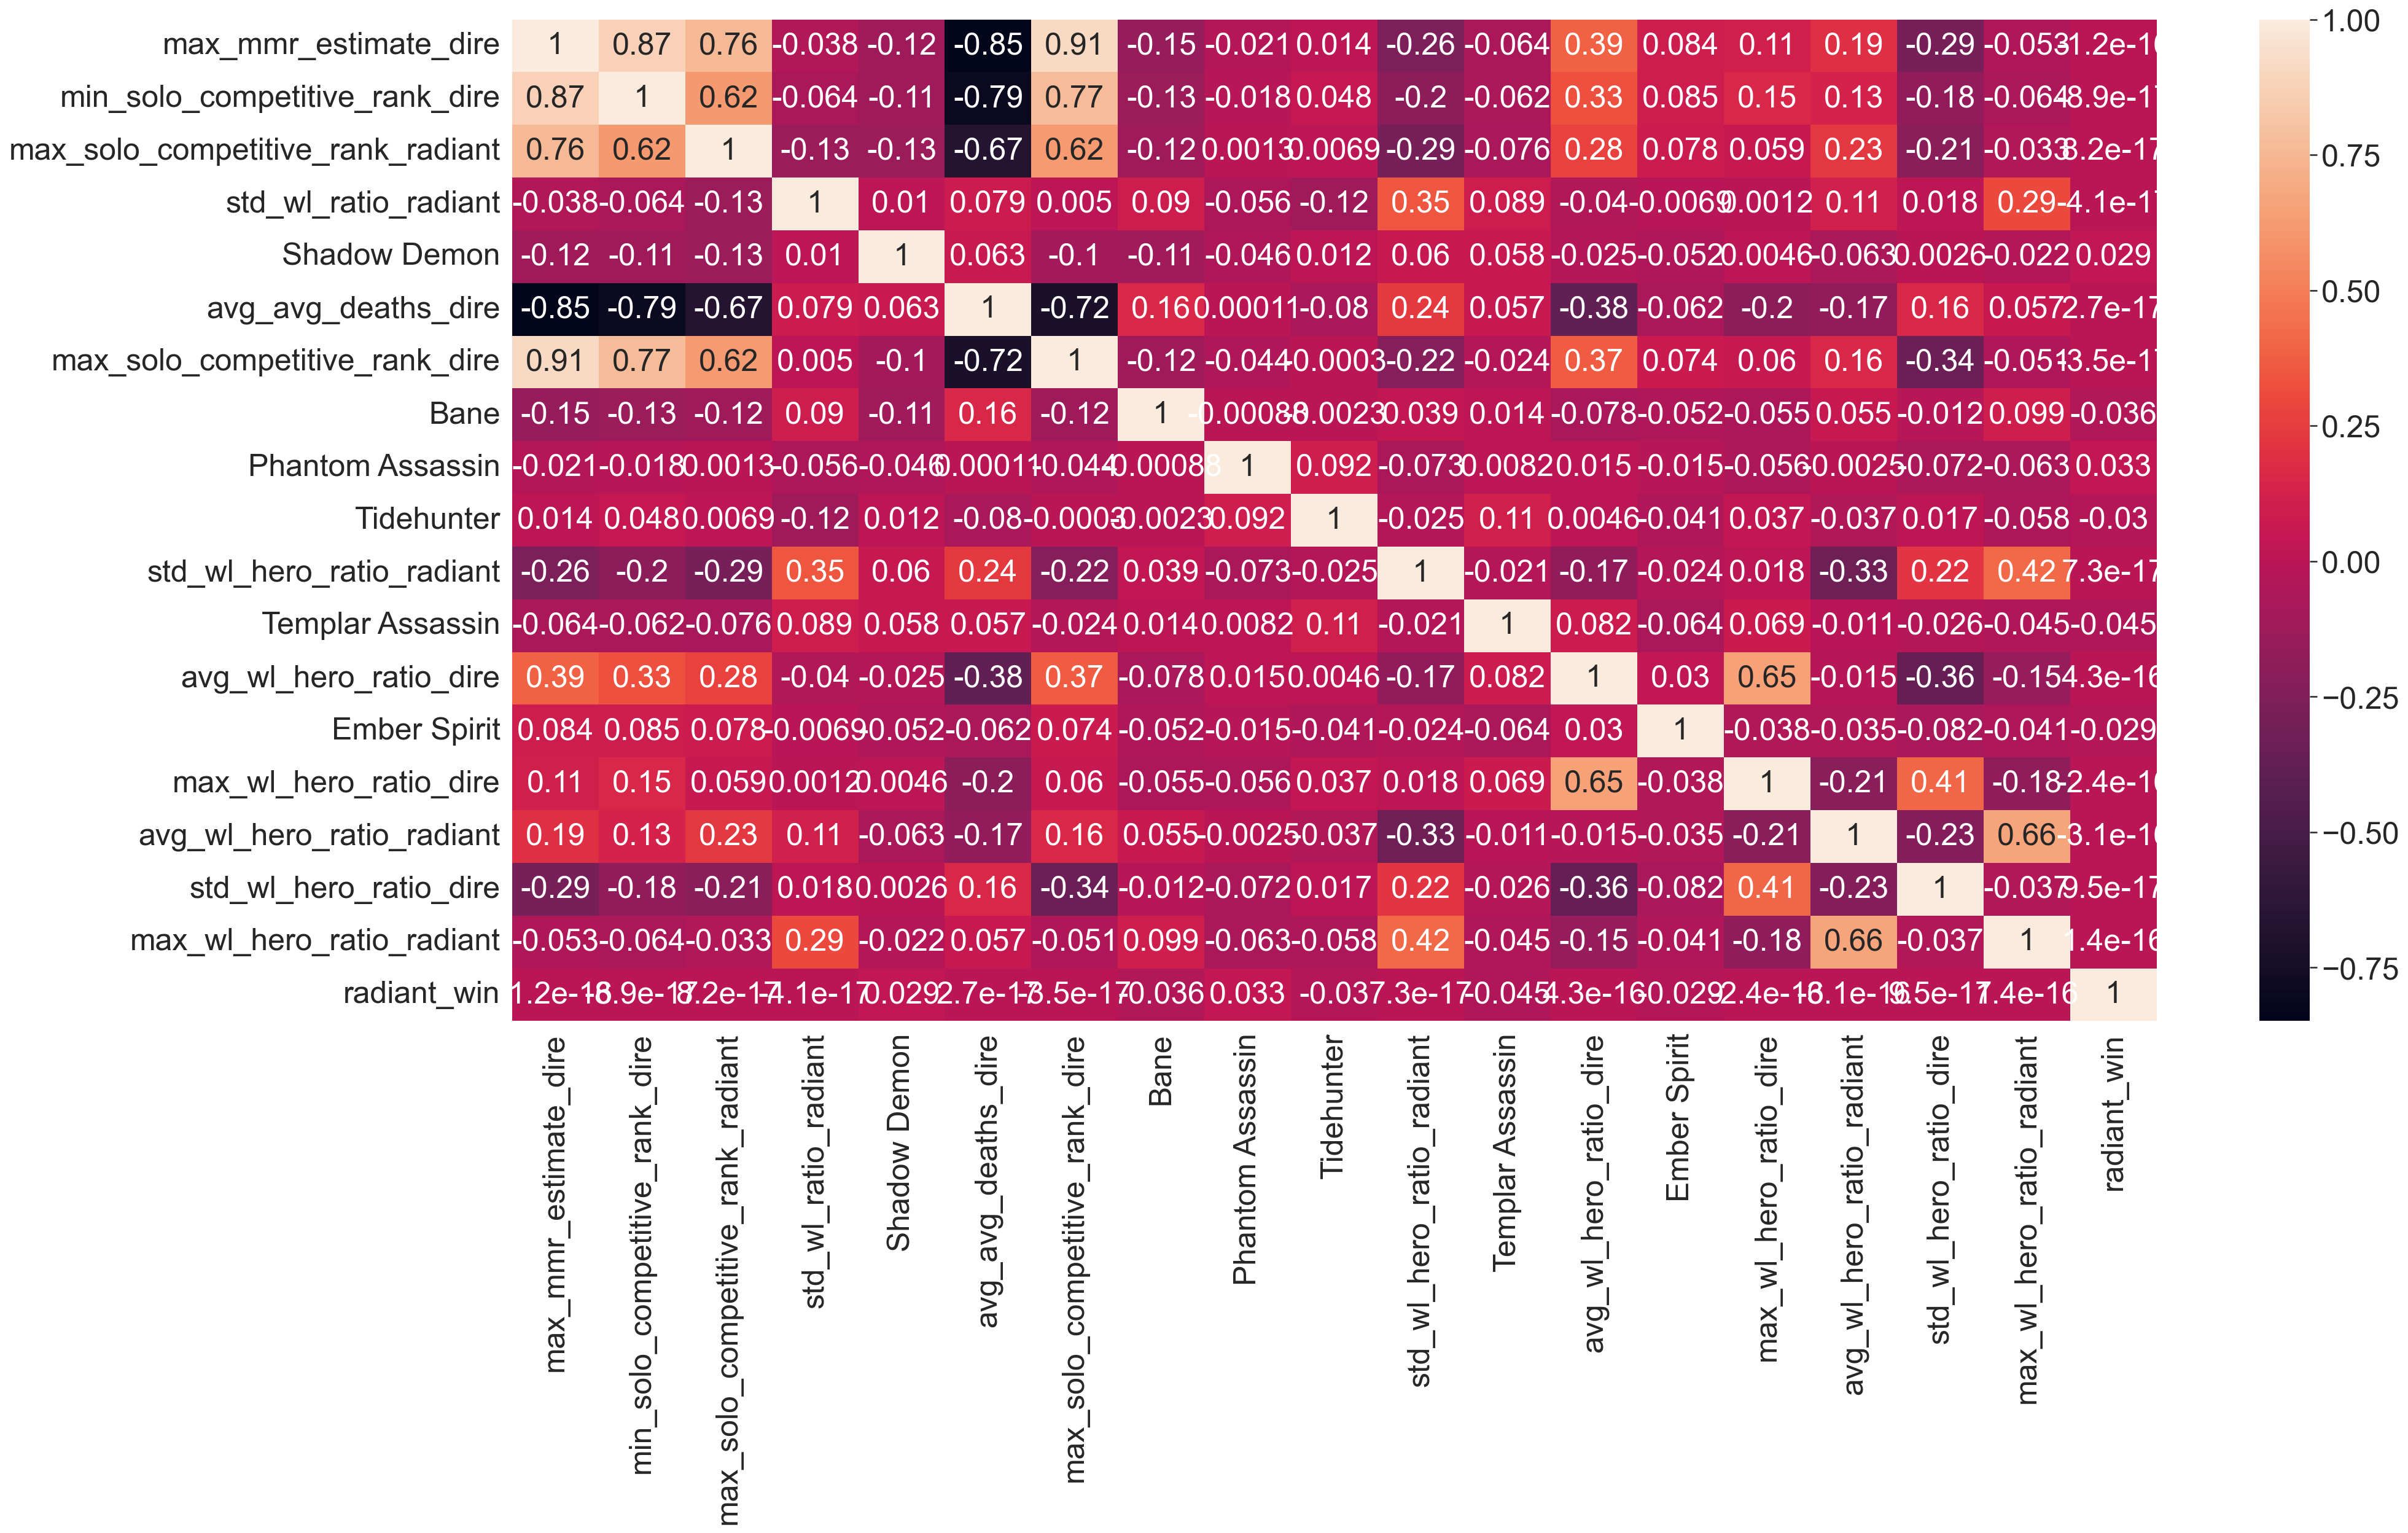

In [192]:
#Calculate the pearson correlation matrix and plot it
top_cols = list(top_df.columns)
top_cols.append('radiant_win')
corr = sdf[top_cols].corr(method='pearson')

#plot the matrix
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True)
plt.savefig('feature_pcorrelation_small.png')

### Large Dataset

#### Plot top features from model coeffiecents

In [193]:
#Scall all importances between 0 and 1
imp_large_inv = imp_large.transpose()
mm_scaler = preprocessing.MinMaxScaler()
imp_large_inv = pd.DataFrame(mm_scaler.fit_transform(imp_large_inv), columns=imp_large_inv.columns, index=imp_large_inv.index)
large_imp = imp_large_inv.transpose()
large_imp.shape

(5, 324)

In [194]:
# Find the top 5 important features for each model
models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
top = list()
for model in models:
    ranks = large_imp.loc[model,:]
    sorted_ranks = {imp_large.columns[k]:v for k,v in sorted(enumerate(ranks), key=lambda item: item[1], reverse=True)}
    top.extend([list(sorted_ranks.keys())[i] for i in range(7)])
    
#New df of only the top columns
top_df = large_imp.copy()
cols = [i for i in imp_large.columns if i not in set(top)]
top_df.drop(columns=cols, inplace=True)

top_df.sort_values(['Decision Trees', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],axis=1, inplace=True)

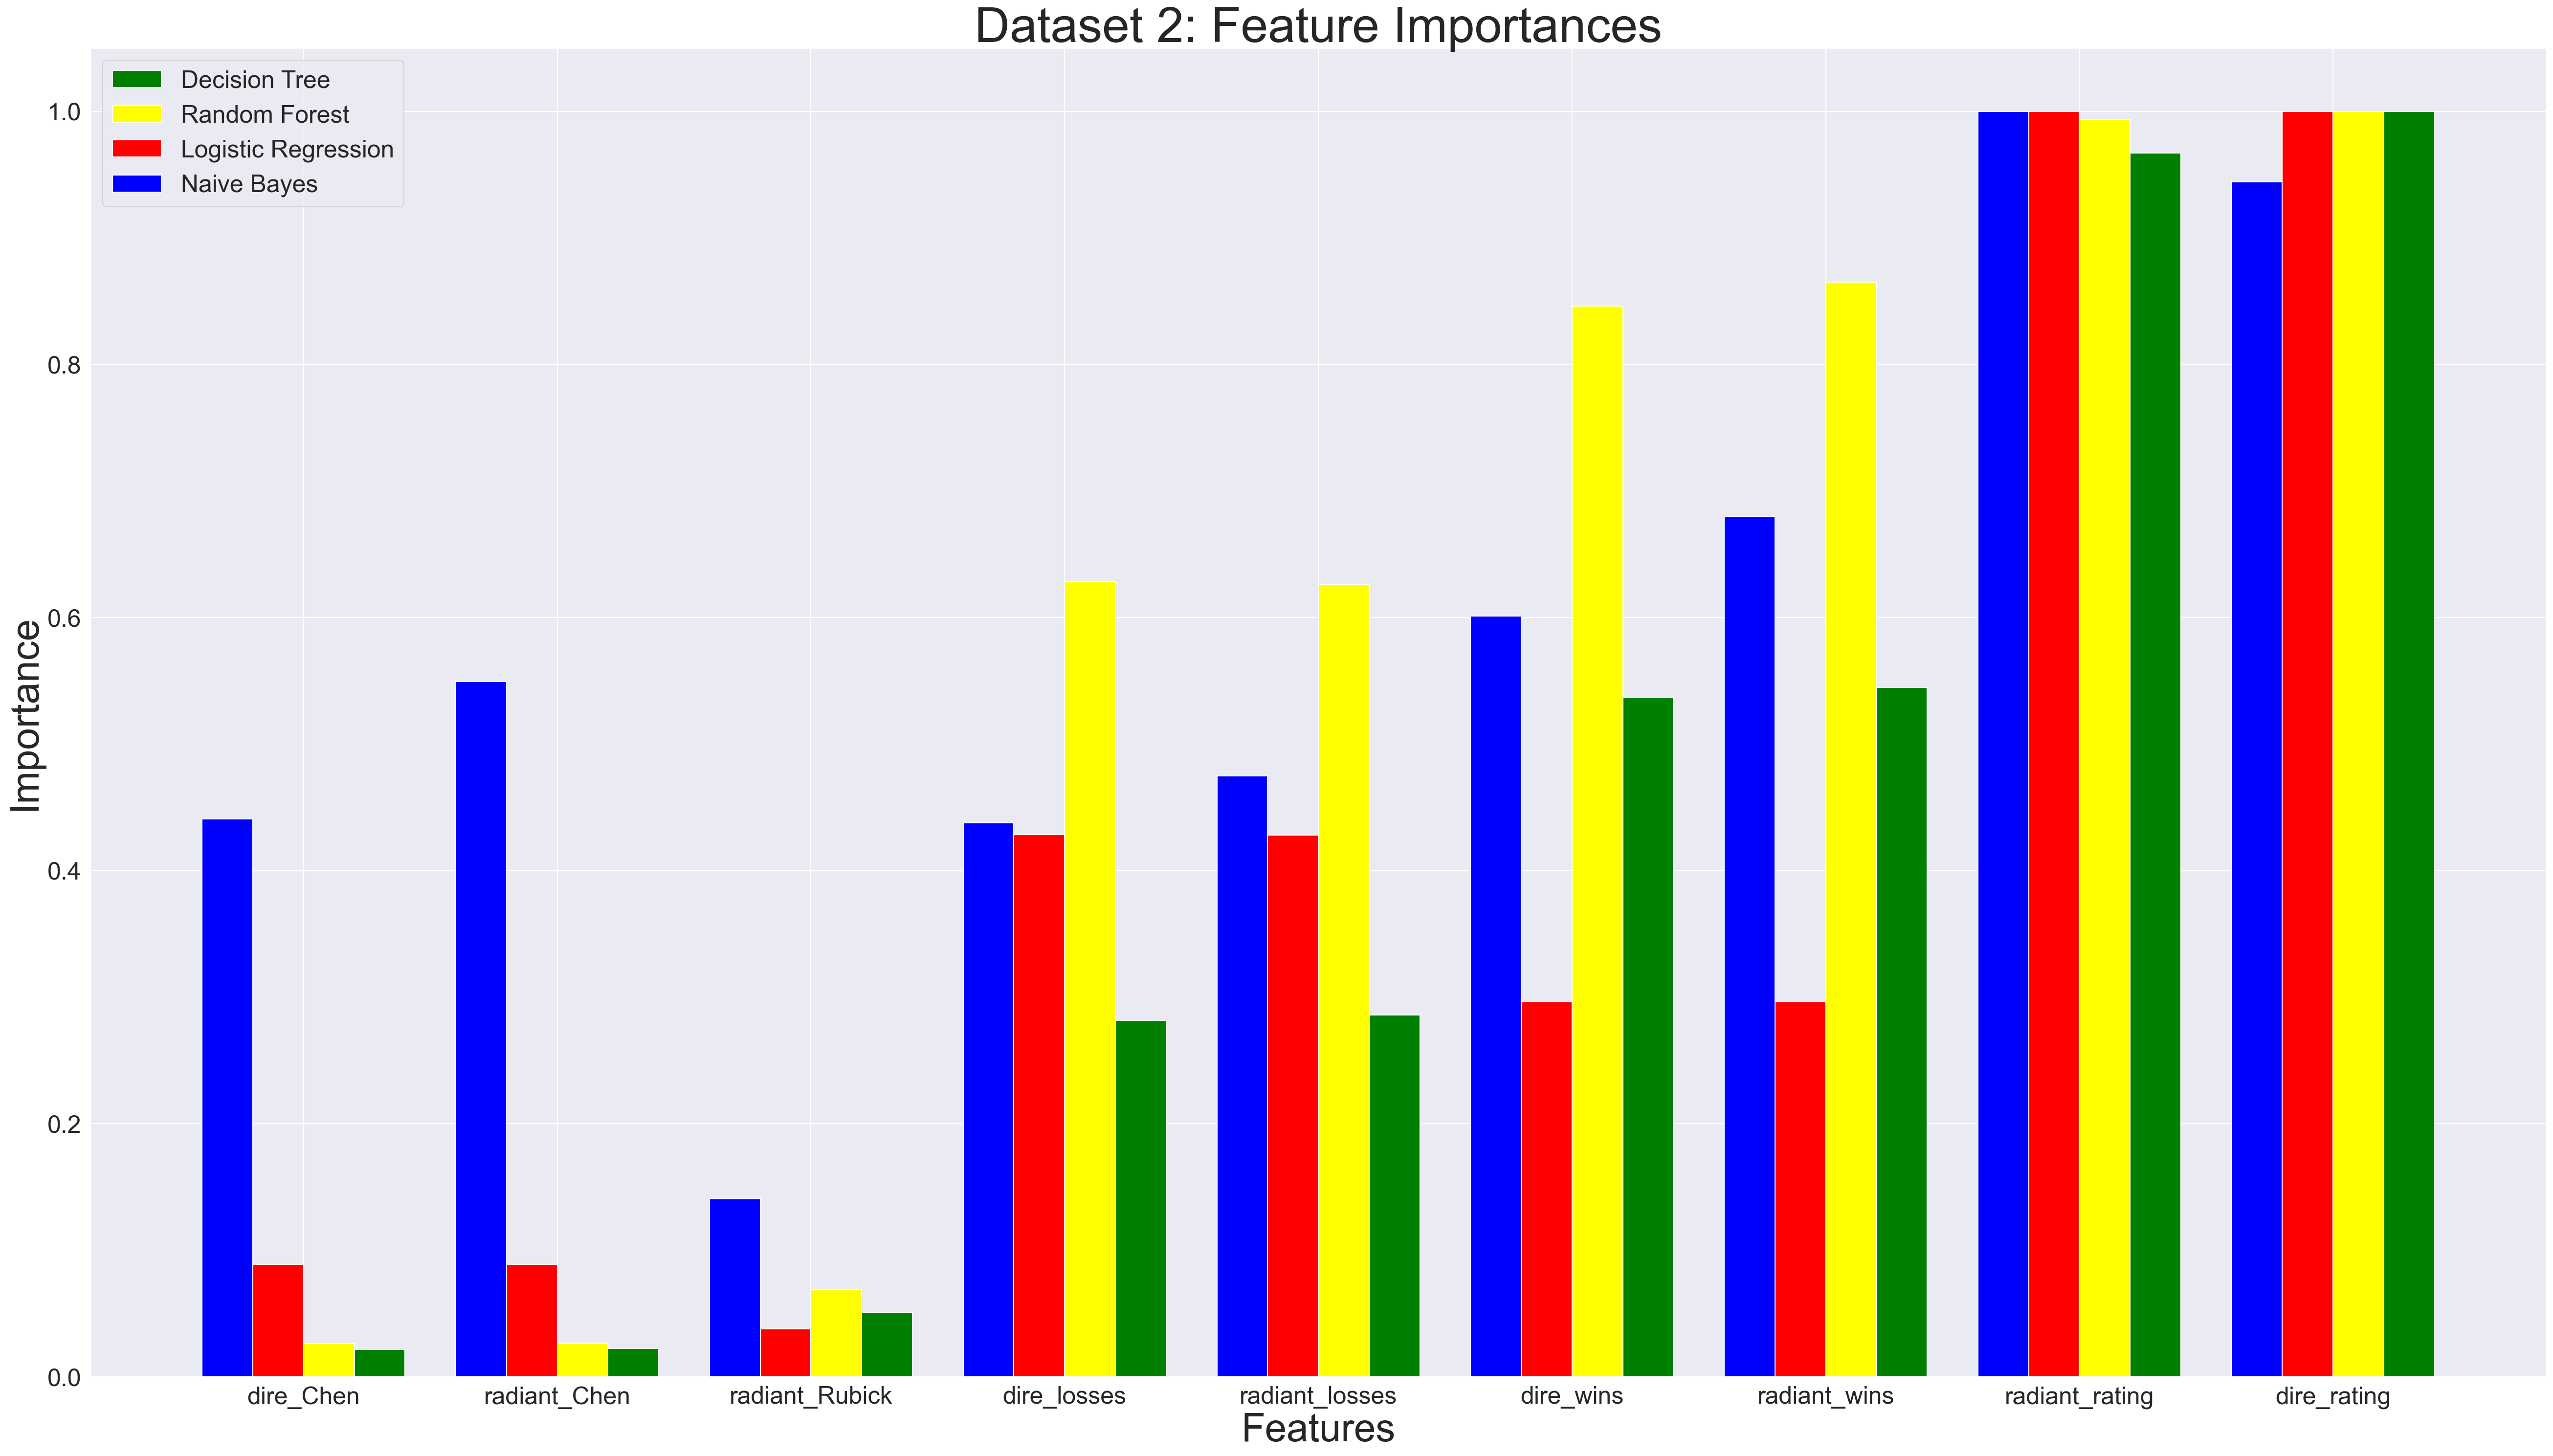

In [195]:
# Create Figure and subplots
index = np.arange(top_df.shape[1]*2, step=2)
fig, ax = plt.subplots(figsize=(45, 25))

# Plots bars
ax.bar(index + 1.2, top_df.iloc[1, :], .4, color='green', label='Decision Tree')
ax.bar(index + .8, top_df.iloc[2, :], .4, color='yellow',  label='Random Forest')
ax.bar(index + .4, top_df.iloc[0, :], .4, color='red', label='Logistic Regression')
ax.bar(index, top_df.iloc[3, :], .4, color='blue', label='Naive Bayes')

# Annotate graph
ax.set(xticks=index+0.6, xticklabels=top_df.columns)
ax.legend()
plt.title('Dataset 2: Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig('feature_importance_large.png')
plt.show()

#### Pearson correlation for the some the top important features 

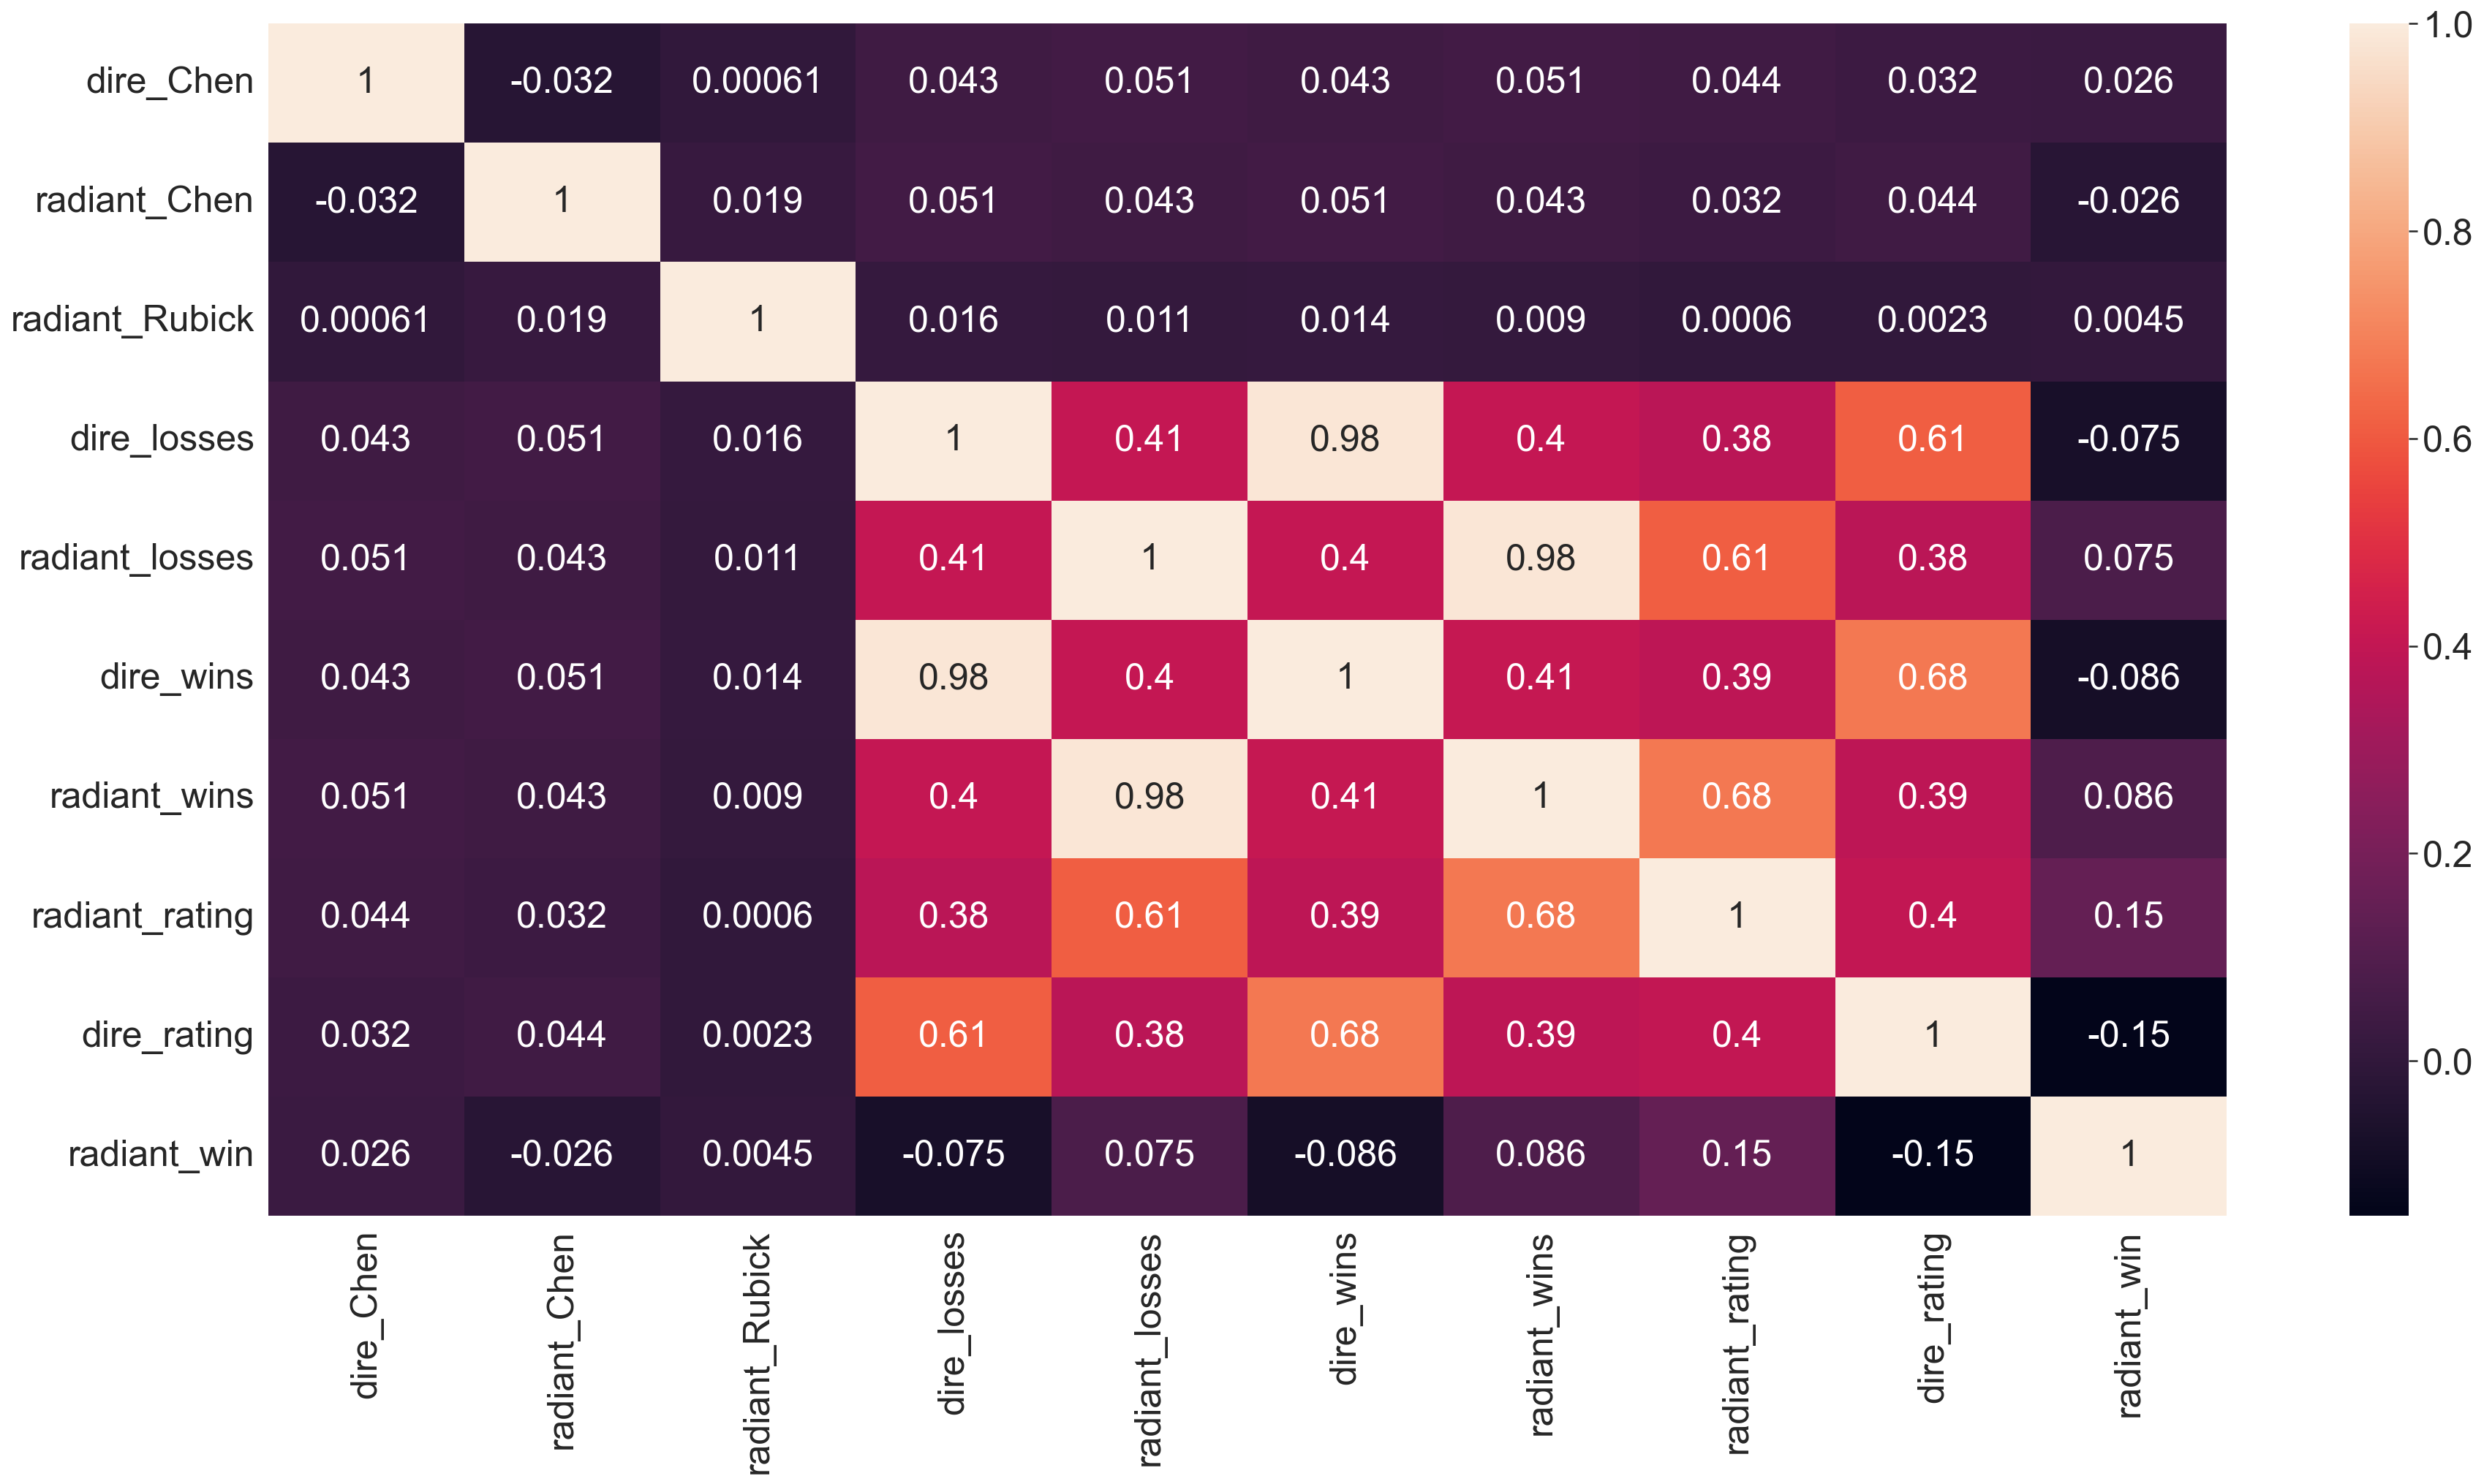

In [196]:
#Calculate the pearson correlation matrix and plot it
top_cols = list(top_df.columns)
top_cols.append('radiant_win')
corr = ldf[top_cols].corr(method='pearson')

#plot the matrix
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True)
plt.savefig('feature_pcorrelation_large.png')

### Recap on top features

Print top 5 ranked features for every model and dataset

In [197]:
for model in models:
    # Get model ranks
    small = {k:v for k,v in sorted(zip(small_imp.columns, small_imp.loc[model, :]), key=lambda item: item[1], reverse=True)}
    large = {k:v for k,v in sorted(zip(large_imp.columns, large_imp.loc[model, :]), key=lambda item: item[1], reverse=True)}
    
    small_keys = list(small.keys())
    small_vals = list(small.values())
    large_keys = list(large.keys())
    large_vals = list(large.values())
    
    # print the top ranked features
    print("{: <20}{} Feature Importance".format("", model))
    print("{: <15}Small Dataset{: <40}Large Dataset{: <10}".format("","",""))
    
    for i in range(5):
        print("{:2.0f}. {: <35} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_keys[i], small_vals[i], i+1, large_keys[i], large_vals[i]))
        
    print()

                    Logistic Regression Feature Importance
               Small Dataset                                        Large Dataset          
 1. min_solo_competitive_rank_dire      - 1.0000    1. radiant_rating       - 1.0000
 2. max_solo_competitive_rank_radiant   - 0.9161    2. dire_rating          - 0.9999
 3. avg_avg_deaths_dire                 - 0.8816    3. dire_losses          - 0.4284
 4. max_solo_competitive_rank_dire      - 0.7442    4. radiant_losses       - 0.4281
 5. max_mmr_estimate_dire               - 0.6239    5. dire_wins            - 0.2964

                    Decision Trees Feature Importance
               Small Dataset                                        Large Dataset          
 1. max_wl_hero_ratio_radiant           - 1.0000    1. dire_rating          - 1.0000
 2. std_wl_hero_ratio_dire              - 0.7275    2. radiant_rating       - 0.9669
 3. avg_wl_hero_ratio_radiant           - 0.6691    3. radiant_wins         - 0.5446
 4. max_wl_hero_ratio_

## Feature Selected Classifiers

In [136]:
# Function that runs a set of classifiers and returns their f1 scores 
def feature_selected_classifiers(features, labels):
    models = ['lrm', 'dtm', 'rfm', 'nbm']
    
    f1_scores = dict()
    
    #Create each of the models
    for model in models:
        if model == 'lrm':
            classifier = LogisticRegression(max_iter=1000)
        elif model == 'dtm': 
            classifier = DecisionTreeClassifier()
        elif model == 'rfm':
            classifier = RandomForestClassifier()
        else:
            classifier = GaussianNB()
            
        # Run 5-Fold cross validation with all 4 models for the given features and labels
        scores = k_fold_validate(5, classifier, features, labels, model, False)
        f1_scores[model] = (scores['f1'][0])

    return f1_scores

In [137]:
# Create dataframe for scores on different feature selection methods (add original ones too)
small_scores = pd.DataFrame()
large_scores = pd.DataFrame()

small_scores = small_scores.append(og_small_score, ignore_index=True)
large_scores = large_scores.append(og_large_score, ignore_index=True)

WARNING: Takes 10-15 min to run

In [140]:
# Run all classifiers on 6 different feature selection methods
small_top = small_imp.shape[1] // 10
large_top = large_imp.shape[1] // 10

# Print number of top features
print("{} Top features from dataset1 and {} Top features from dataset 2.".format(small_top, large_top))

models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
for model in models:
    #Retrieve the ordered list of features by importance
    small = {k:v for k,v in sorted(zip(small_imp.columns, small_imp.loc[model, :]), key=lambda item: item[1], reverse=True)}
    large = {k:v for k,v in sorted(zip(large_imp.columns, large_imp.loc[model, :]), key=lambda item: item[1], reverse=True)}
    
    # Run classifiers on top features of small dataset
    features = [list(small.keys())[i] for i in range(small_top)]
    small_scores = small_scores.append(feature_selected_classifiers(Xs[features], ys), ignore_index=True)
    
    # Run classifiers on top features of large dataset
    features = [list(large.keys())[i] for i in range(large_top)]
    large_scores = large_scores.append(feature_selected_classifiers(Xl[features], yl), ignore_index=True)

21 Top features from dataset1 and 32 Top features from dataset 2.


In [155]:
temp_small = small_scores.copy()
temp_large = large_scores.copy()

#### Add Pearson Correlation

In [145]:
## SMALL DATA SET

# define feature selection
fs = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=small_top)
X_selected = pd.DataFrame(fs.fit_transform(Xs, ys))
small_scores = small_scores.append(feature_selected_classifiers(X_selected, ys), ignore_index=True)
print("Pearson Correlation dataset 1 features: {}".format(X_selected.shape[1]))


## LARGE DATA SET

# define feature selection
fs = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=large_top)
X_selected = pd.DataFrame(fs.fit_transform(Xl, yl))
large_scores = large_scores.append(feature_selected_classifiers(X_selected, yl), ignore_index=True)
print("Pearson Correlation dataset 2 features: {}".format(X_selected.shape[1]))

Pearson Correlation dataset 1 features: 21
Pearson Correlation dataset 2 features: 32


In [148]:
# Add labels and index
small_scores.columns = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
large_scores.columns = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']

models.insert(0, 'Original Scores')
models.append('Pearson Correlation')
small_scores.index = models
large_scores.index = models

In [149]:
small_scores

Logistic Regression  Decision Trees  Random Forest  \
Original Scores                 0.261907        0.500298       0.105753   
Logistic Regression             0.385068        0.152192       0.123939   
Decision Trees                  0.460251        0.386196       0.148348   
Random Forest                   0.450996        0.408449       0.223409   
Naive Bayes                     0.443235        0.344899       0.231753   
Ridge Regression                0.459023        0.452148       0.304360   
Pearson Correlation             0.463529        0.590448       0.602843   

                     Naive Bayes  
Original Scores         0.335592  
Logistic Regression     0.410919  
Decision Trees          0.531221  
Random Forest           0.472022  
Naive Bayes             0.354787  
Ridge Regression        0.444454  
Pearson Correlation     0.334770

In [150]:
large_scores

Logistic Regression  Decision Trees  Random Forest  \
Original Scores                 0.635751        0.604735       0.664609   
Logistic Regression             0.639889        0.604794       0.653685   
Decision Trees                  0.645506        0.603890       0.654608   
Random Forest                   0.645920        0.604391       0.653670   
Naive Bayes                     0.640865        0.606035       0.651480   
Ridge Regression                0.639889        0.605080       0.654284   
Pearson Correlation             0.640267        0.605577       0.652830   

                     Naive Bayes  
Original Scores         0.378651  
Logistic Regression     0.585079  
Decision Trees          0.592208  
Random Forest           0.600085  
Naive Bayes             0.592266  
Ridge Regression        0.585079  
Pearson Correlation     0.584402

#### Graph feature selection matrix

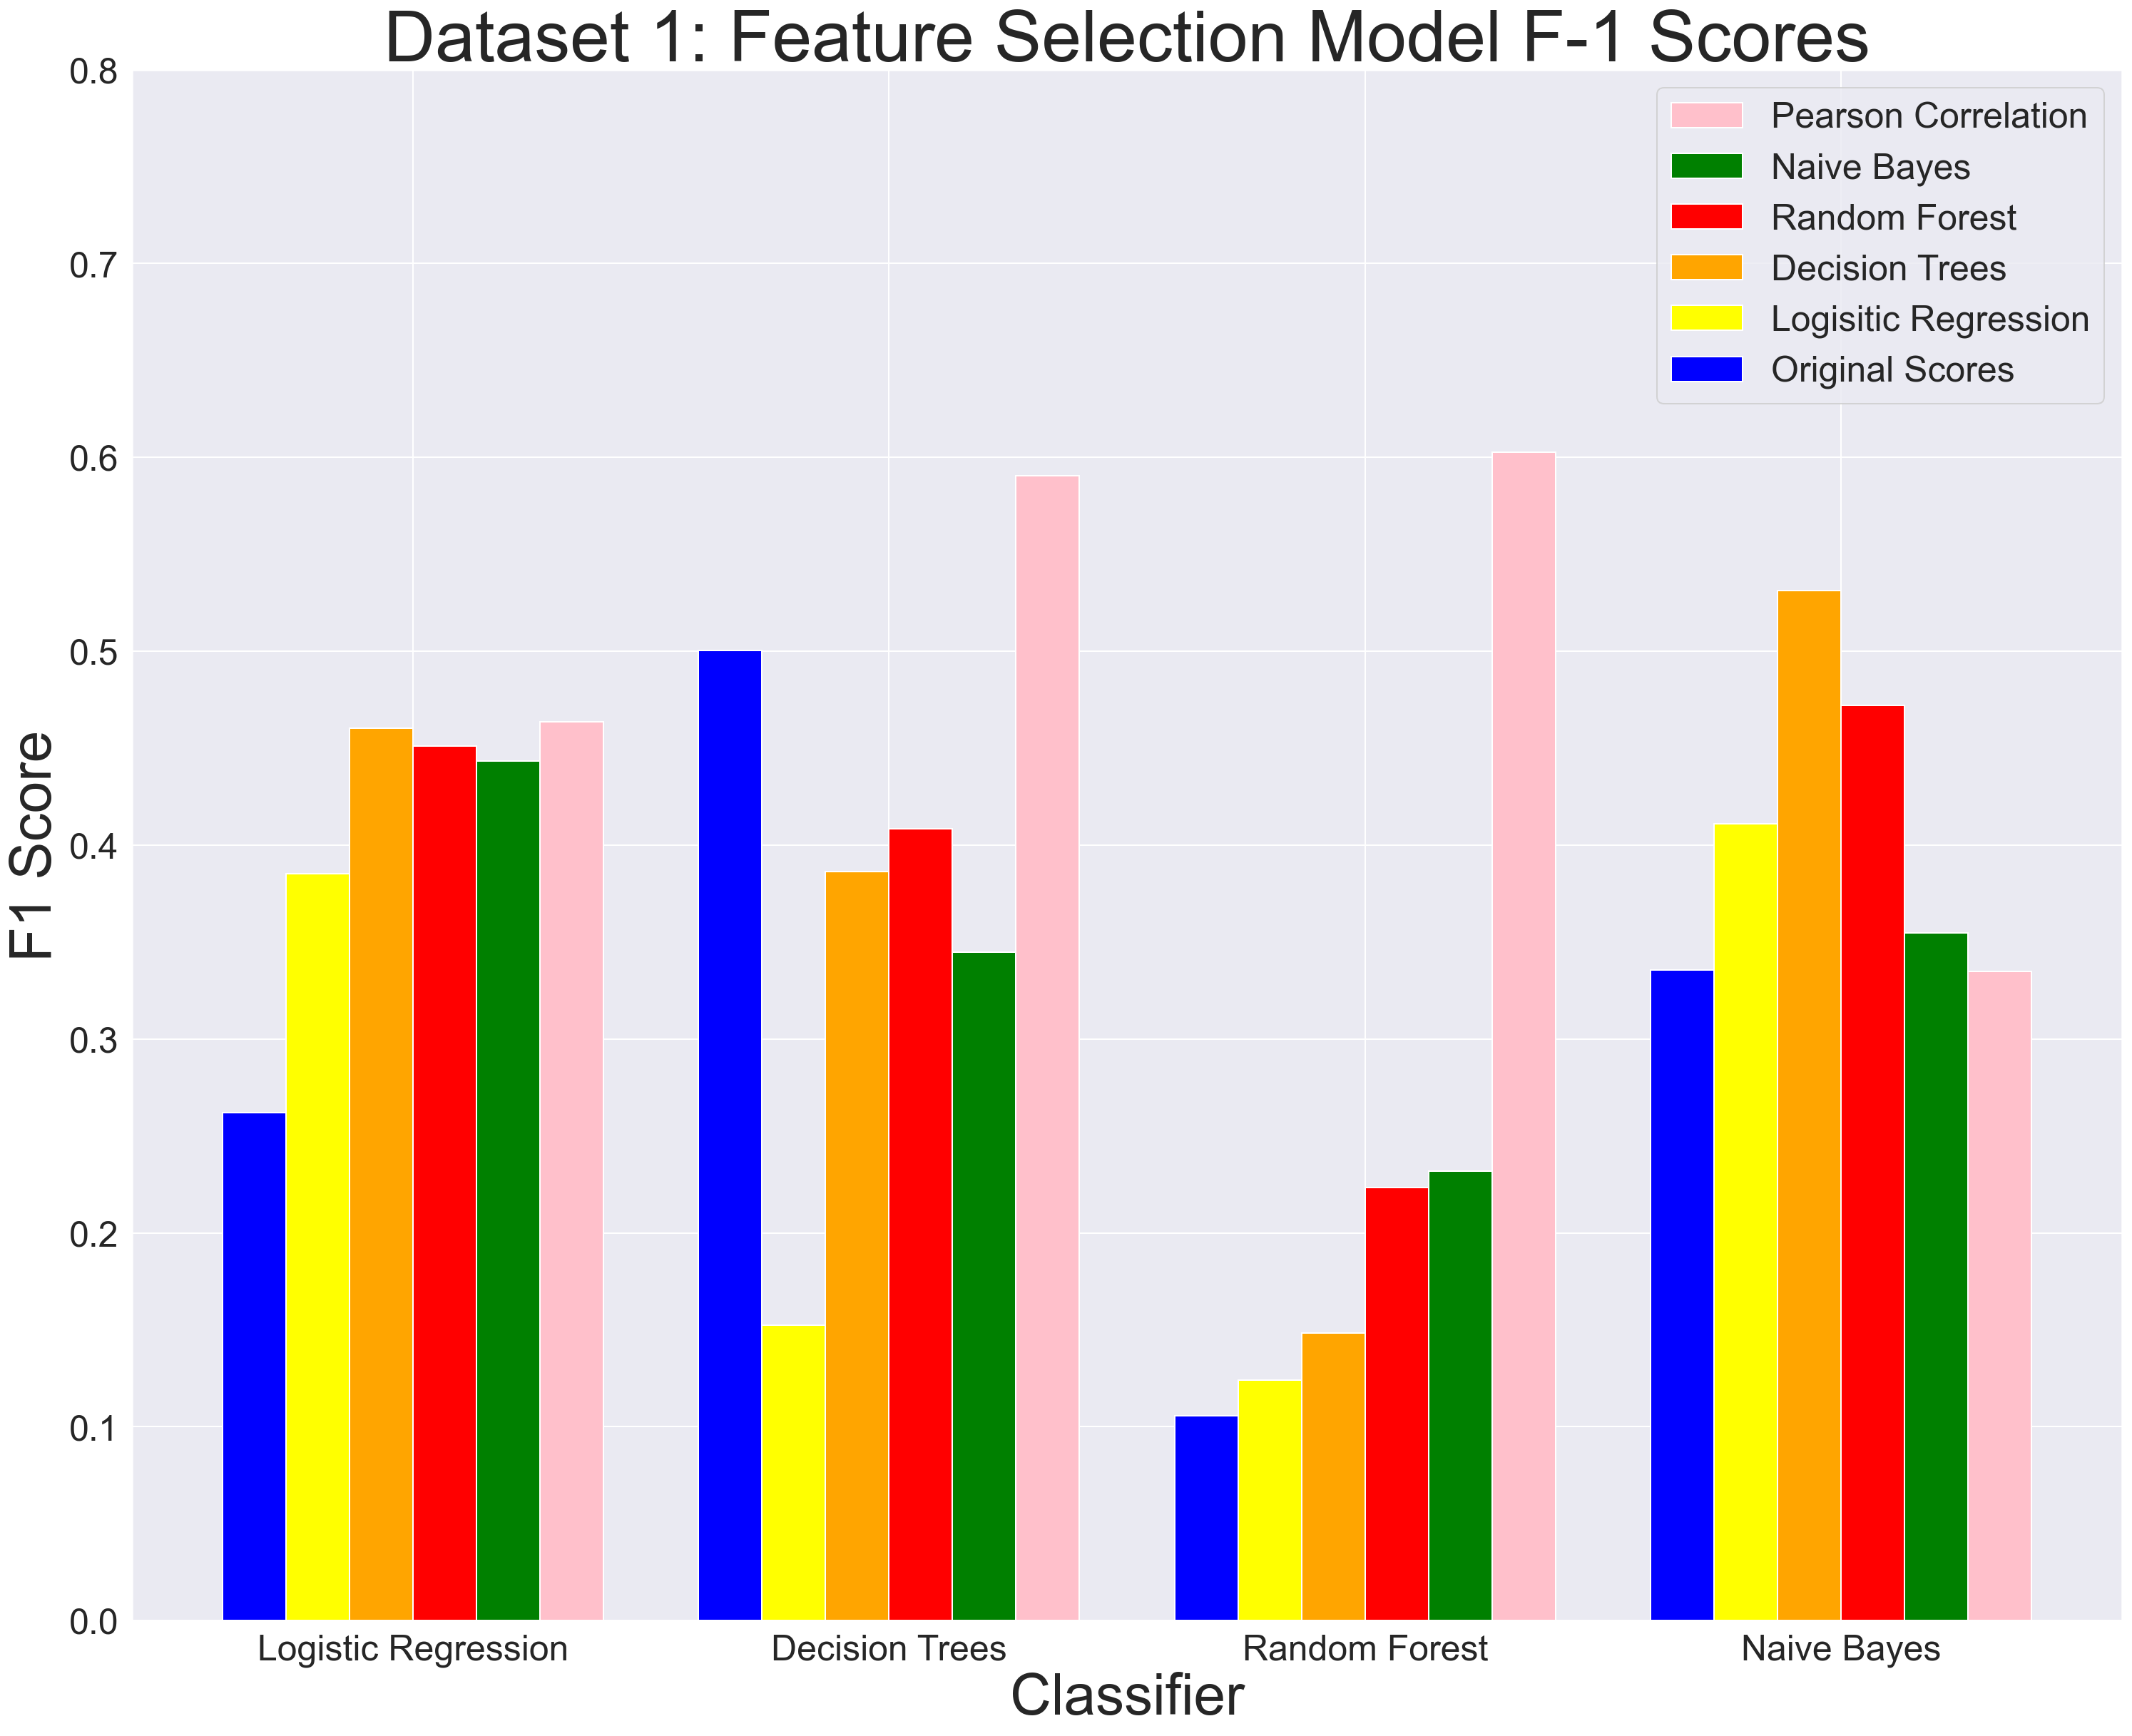

In [183]:
# Create Figure and subplot
index = np.arange(small_scores.shape[1]*3, step=3)
fig, ax = plt.subplots(figsize=(25,20))

# Plot Bars and its labels
ax.bar(index + 2.0, small_scores.iloc[6, :], .4, color='pink', label='Pearson Correlation')
ax.bar(index + 1.6, small_scores.iloc[4, :], .4, color='green',  label='Naive Bayes')
ax.bar(index + 1.2, small_scores.iloc[3, :], .4, color='red', label='Random Forest')
ax.bar(index + .8, small_scores.iloc[2, :], .4, color='orange', label='Decision Trees')
ax.bar(index + .4, small_scores.iloc[1, :], .4, color='yellow', label='Logisitic Regression')
ax.bar(index, small_scores.iloc[0, :], .4, color='blue', label='Original Scores')

# Annotate graph
ax.set(xticks=index+1, xticklabels=small_scores.columns)
ax.set_ylim(0,.8)
ax.legend()
plt.title('Dataset 1: Feature Selection Model F-1 Scores')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.savefig('feature_selection_small.png')
plt.show()

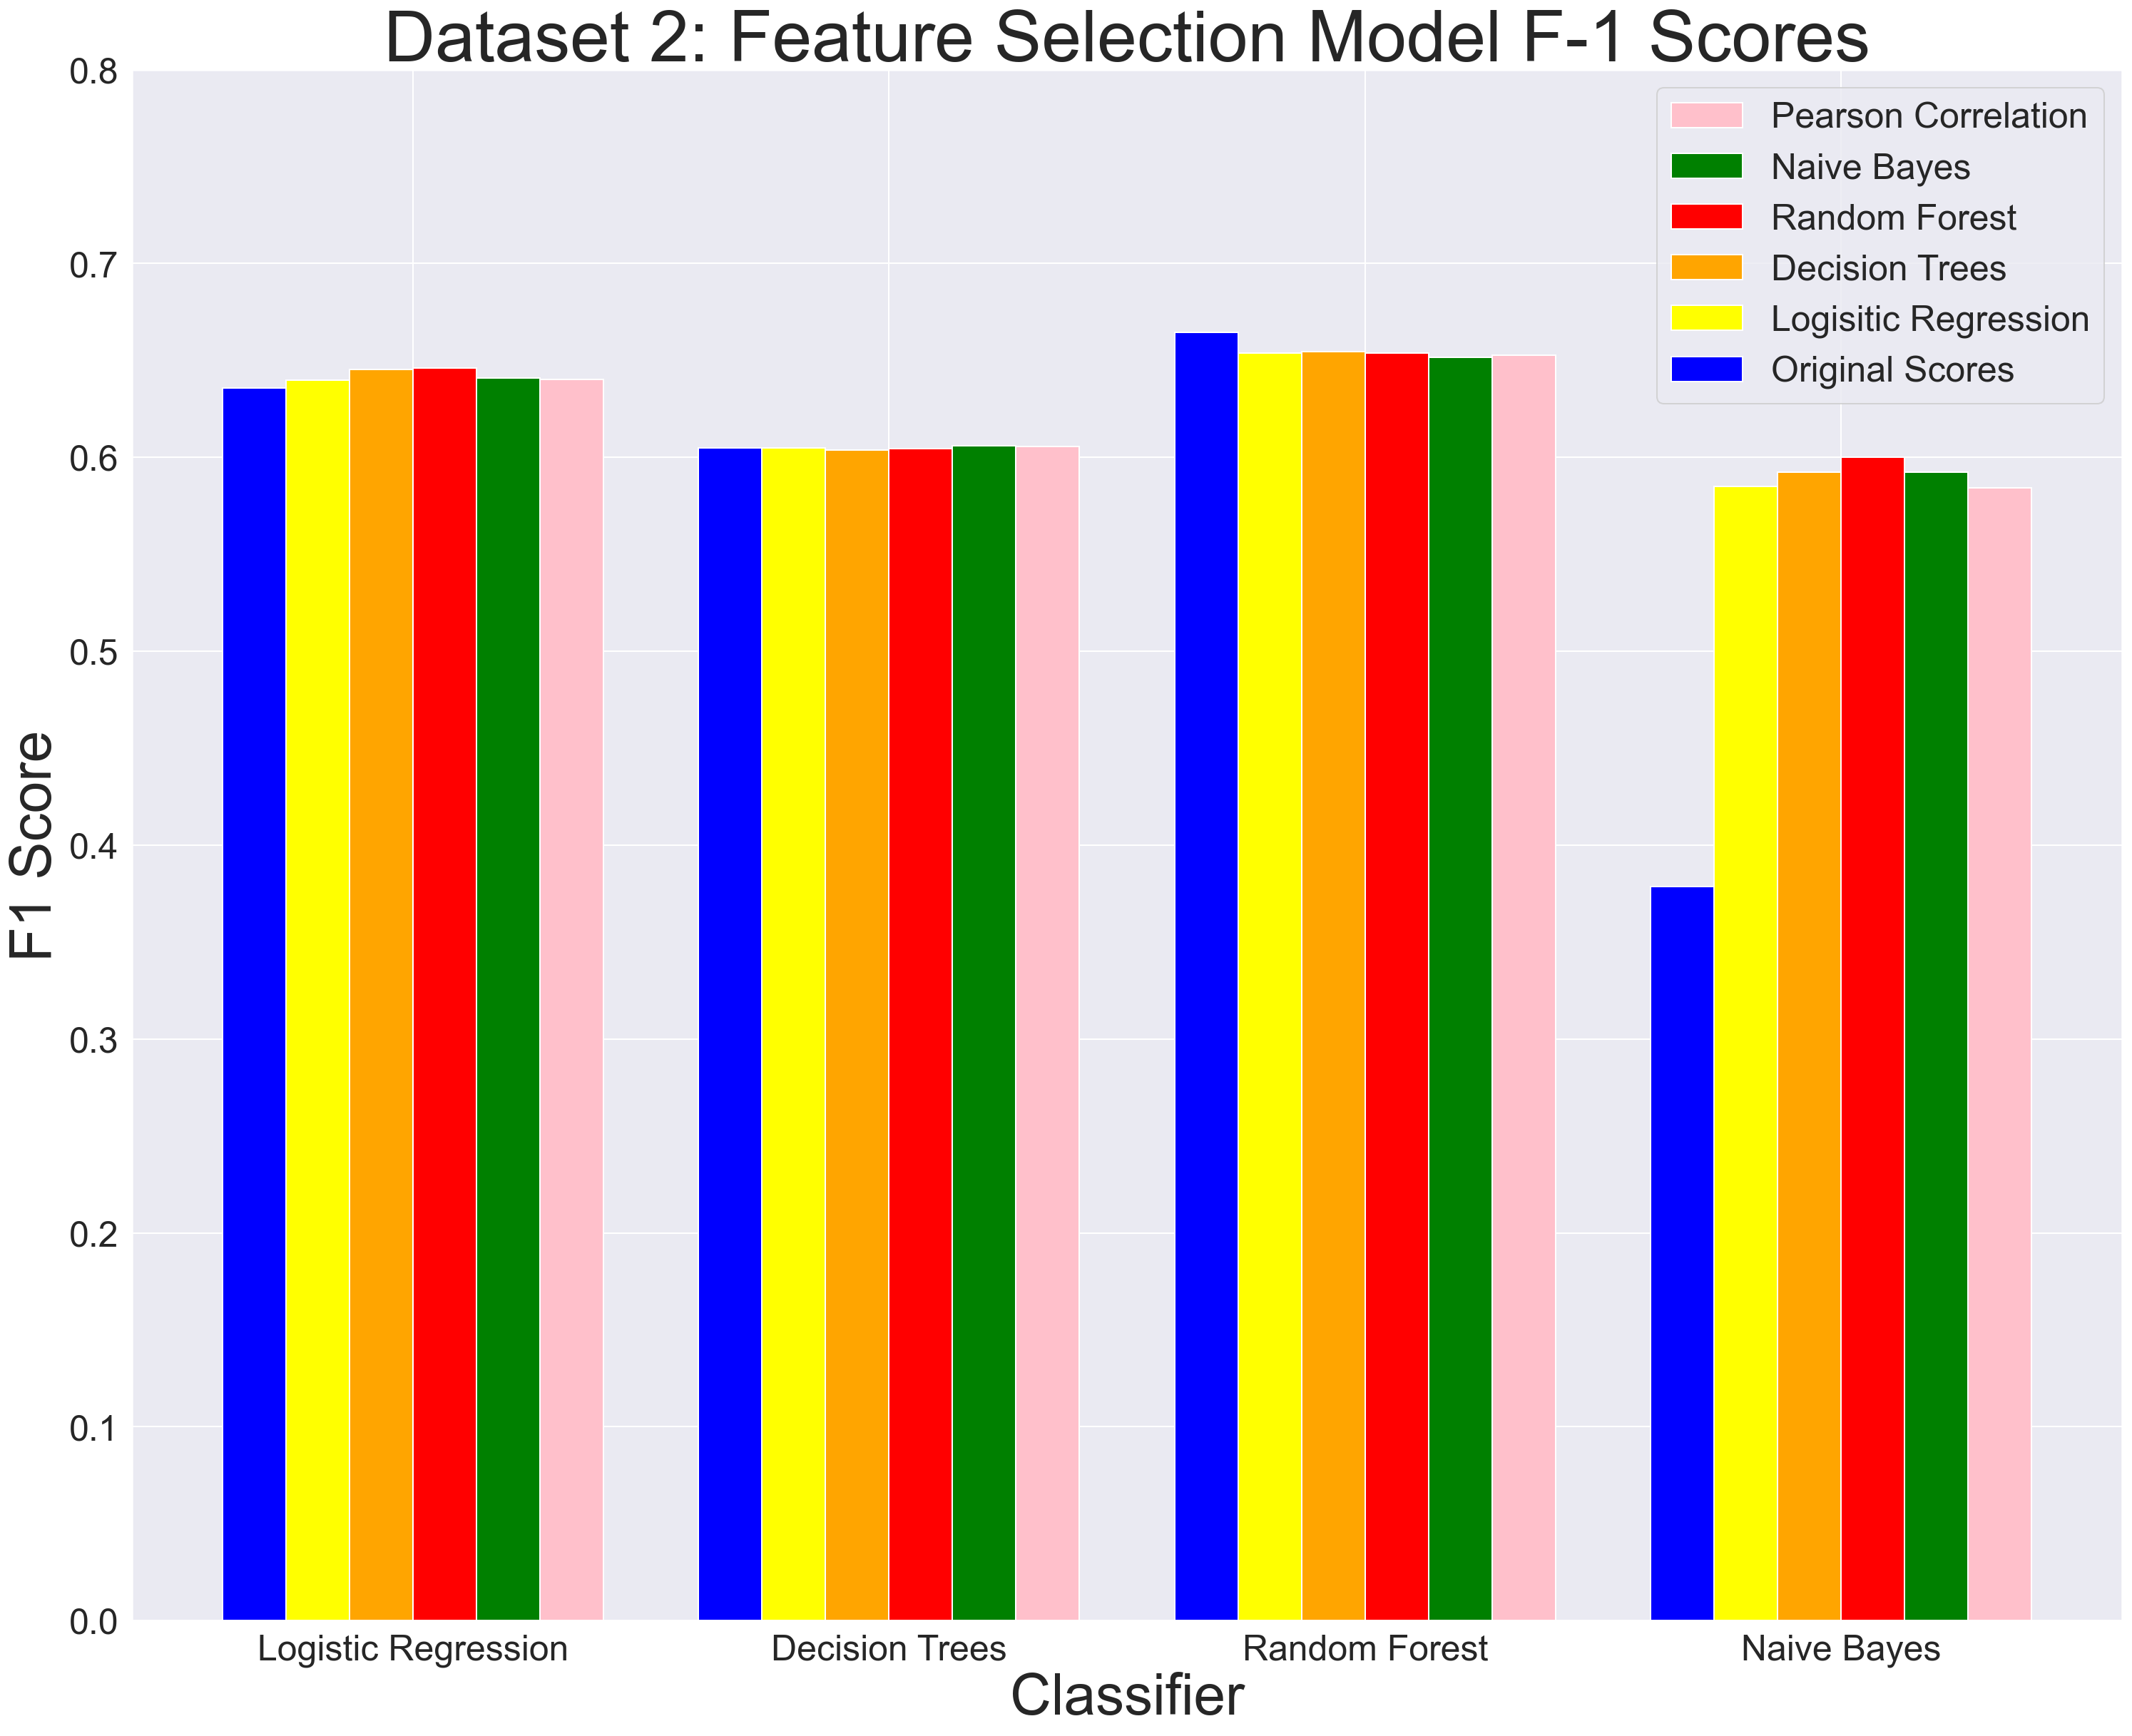

In [187]:
# Create Figure and Subplot
index = np.arange(large_scores.shape[1]*3, step=3)
fig, ax = plt.subplots(figsize=(25, 20))

# Plot Bars and its labels
ax.bar(index + 2.0, large_scores.iloc[6, :], .4, color='pink', label='Pearson Correlation')
ax.bar(index + 1.6, large_scores.iloc[4, :], .4, color='green',  label='Naive Bayes')
ax.bar(index + 1.2, large_scores.iloc[3, :], .4, color='red', label='Random Forest')
ax.bar(index + .8, large_scores.iloc[2, :], .4, color='orange', label='Decision Trees')
ax.bar(index + .4, large_scores.iloc[1, :], .4, color='yellow', label='Logisitic Regression')
ax.bar(index, large_scores.iloc[0, :], .4, color='blue', label='Original Scores')

# Annotate graph
ax.set(xticks=index+1, xticklabels=large_scores.columns)
ax.set_ylim(0, .8)
ax.legend()
plt.title('Dataset 2: Feature Selection Model F-1 Scores')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.savefig('feature_selection_large.png')
plt.show()

## PCA

#### Large Dataset

In [13]:
# Create train test splits
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xl, yl, shuffle=True, test_size=0.3, random_state=7)
X_train.shape

(146923, 324)

 Perform PCA on features with 2, 3, 7 PCA components

In [14]:
def perform_pca(train: pd.DataFrame, test: pd.DataFrame, components: int):
    scl = preprocessing.StandardScaler()
    scl = scl.fit(train)
    scl_train = pd.DataFrame(scl.transform(train), index=train.index, columns=train.columns)
    scl_test = pd.DataFrame(scl.transform(test), index=test.index, columns=test.columns)

    pca = decomposition.PCA(n_components=components)
    pca = pca.fit(train)

    pca_train = pd.DataFrame(pca.transform(scl_train))
    pca_train.index = scl_train.index

    pca_test = pd.DataFrame(pca.transform(scl_test))
    pca_test.index = scl_test.index

    return pca_train, pca_test

X_train_pca_2, X_test_pca_2 = perform_pca(X_train, X_test, 2)
X_train_pca_3, X_test_pca_3 = perform_pca(X_train, X_test, 3)
X_train_pca_7, X_test_pca_7 = perform_pca(X_train, X_test, 7)

 Plot PCA 2

Text(0, 0.5, 'PCA Component 2')

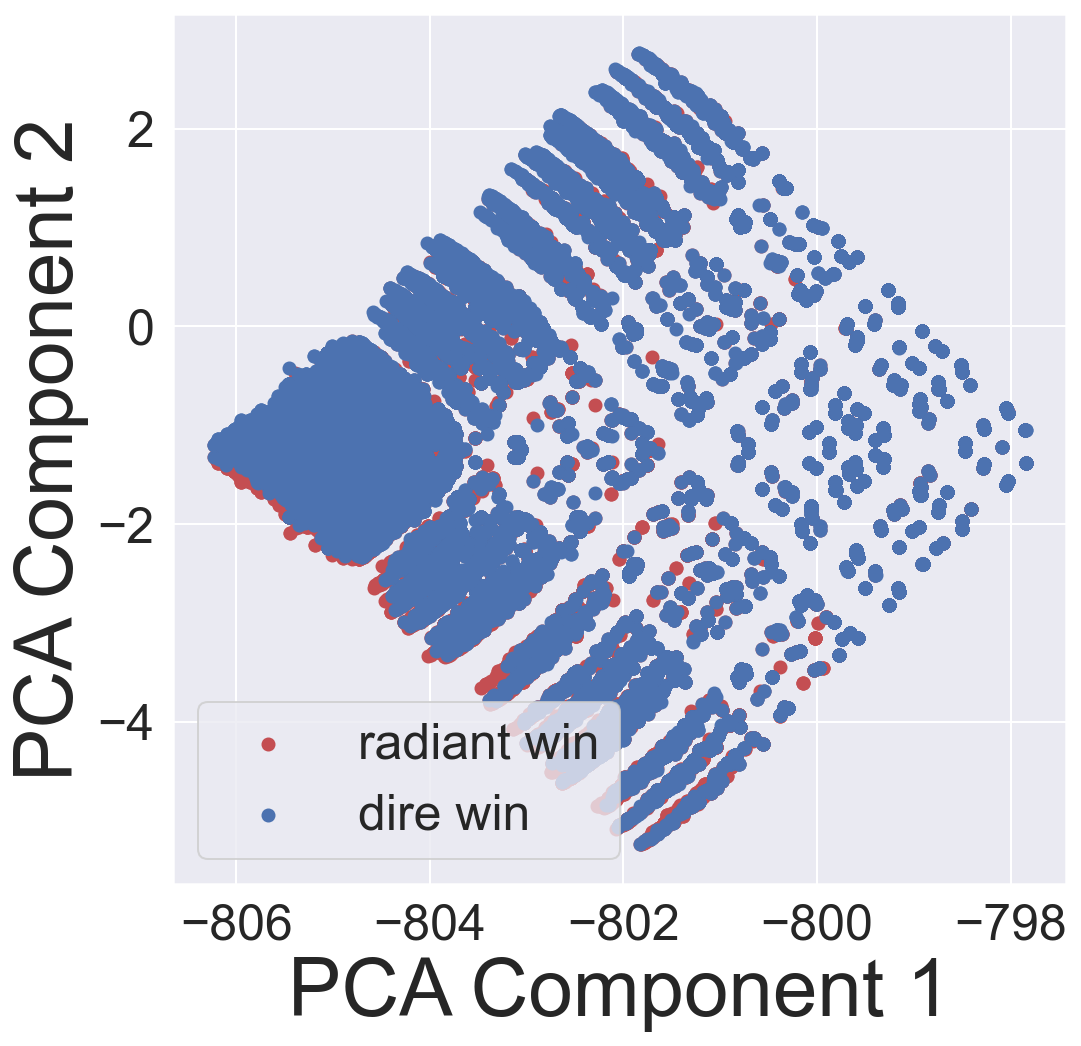

In [15]:
 #plot the PCA with color labels
fig, ax = plt.subplots(figsize=(8, 8))
color = ['r', 'b']
label = ['radiant win', 'dire win']

for t in {0, 1}:
    win_mask = y_train == t
    ax.scatter(X_train_pca_2.values[win_mask, 0], X_train_pca_2.values[win_mask, 1],
             label=label[t], color=color[t])

ax.legend()
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')

Plot PCA 3

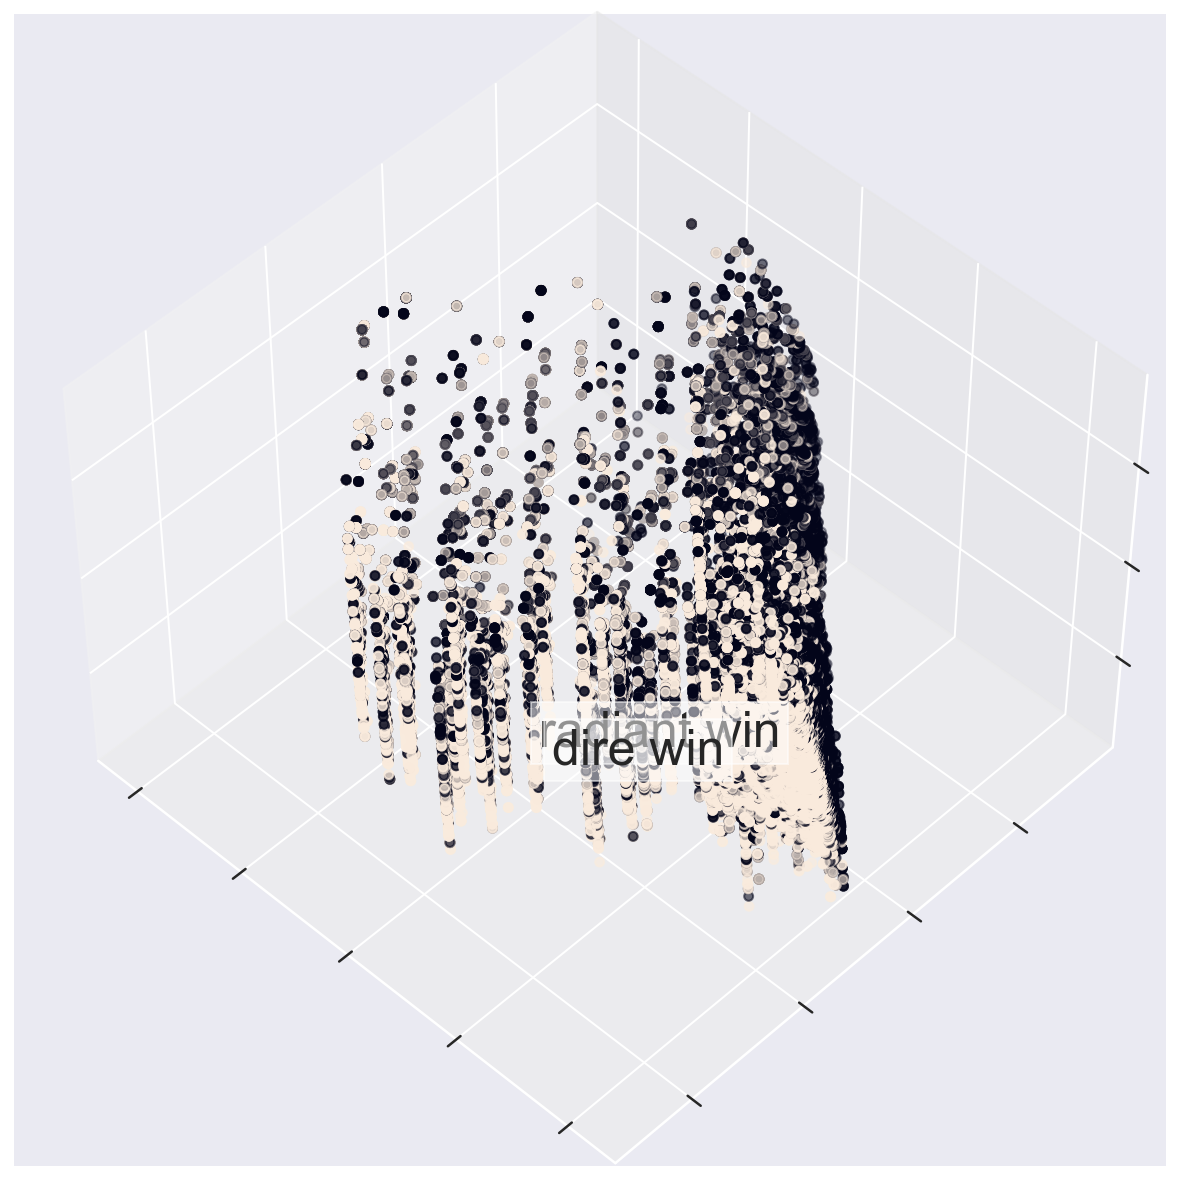

In [16]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=48, azim=134)

for t in {0, 1}:
  ax.text3D(X_train_pca_3.values[y_train == t, 0].mean(),
            X_train_pca_3.values[y_train == t, 1].mean() + 1.5,
            X_train_pca_3.values[y_train == t, 2].mean(), label[t], horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(X_train_pca_3.values[:, 0],
           X_train_pca_3.values[:, 1],
           X_train_pca_3.values[:, 2], c=y_train) #plotting the 3 clusters

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()